In [1]:
%matplotlib inline
from k8sclient.keywords import (
    list_ready_nodes,
    switch_cluster,
    register_cluster,
)
import pandas as pd

In [2]:
# default
switch_cluster("default")
for n in list_ready_nodes():
    print n

10.19.137.140
10.19.137.141
10.19.137.142
10.19.137.143
10.19.137.144
10.19.137.145
10.19.137.147
10.19.137.148
10.19.137.149
10.19.137.150
10.19.137.151
10.19.137.152
10.19.137.153
10.19.137.154
10.19.140.12
10.19.140.15
10.19.140.4


In [27]:
# switch user
register_cluster("yancheng", "~/.kube/config-yancheng")
switch_cluster("yancheng")
for n in list_ready_nodes():
    print n

10.19.248.12
10.19.248.13
10.19.248.14
10.19.248.15
10.19.248.16
10.19.248.17
10.19.248.18
10.19.248.19
10.19.248.20
10.19.248.21
10.19.248.22
10.19.248.23
10.19.248.24
10.19.248.25
10.19.248.26
10.19.248.27
10.19.248.28
10.19.248.29
10.19.248.30
10.19.248.31
10.19.248.32
10.19.248.33
10.19.248.34
10.19.248.35
10.19.248.36
10.19.248.37
10.19.248.38
10.19.248.39
10.19.248.40
10.19.248.41
10.19.248.42
10.19.248.43
10.19.248.44
10.19.248.45
10.19.248.46
10.19.248.47


In [31]:
switch_cluster("yancheng")
from k8sclient.dataframes import collect_all_pods
pods = collect_all_pods()

In [6]:

container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
bads = container[(container['state'] != 'running') | (container['phase'] != 'Running')]
c = bads.groupby(['namespace', "phase"]).size().reset_index().set_index(["namespace","phase"])
c.columns = ['count']
c

,,count
namespace,phase,
ary,Running,2
cc-qa-test,Pending,3
cc-wjx-local,Pending,1
ccc-hadoop,Running,3
hadoop,Pending,2
iot-demo1,Running,1
jingwuyun,Pending,1
yancheng-jsonnet,Pending,3


In [7]:
# list pod count using host-path
v = pods['volume']
hp = v[v.vtype == "host_path"].dropna(axis=1)
hpp = pd.merge(pods['pod'], hp, left_on="uid", right_on="pod_id")
hpp[["name", "path", "host_ip", "namespace", "pod"]].groupby("namespace").size().reset_index().set_index("namespace")

,0
namespace,
4tools,2
ceph,135
ceph-dq,117
ceph-test,102
gaming,1
hadoop-dengquan,5
hadoop-dq,5
haproxy,2
he2chat,1


In [8]:
# found 0 limit pods
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
bads = runnings[(runnings.lmemory == 0) | (runnings.lcpu == 0)]
pd.DataFrame({"#pods without memory/cpu limit":bads.groupby("namespace").size()})

,#pods without memory/cpu limit
namespace,
aaron,3
ary,31
cc-dev,1
ccc-hadoop,14
cust-pro,2
dataflow-demo,1
dataflow-demo-ye,26
ex-kafka,32
hadoop-dq,3


In [9]:
# cpu request too much
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
bads = runnings[(runnings.rcpu > 4) ]
bads[['namespace', "pod", 'rcpu', 'rmemory']].sort_values(by="rcpu", ascending=False)

,namespace,pod,rcpu,rmemory
325,hadoop-dengquan,nodemanager-b8c69,24.0,128.000000
326,hadoop-dengquan,nodemanager-pxqt1,24.0,128.000000
309,grpc-test,dojoyn-joinerservice-rs-fhbv6,8.0,6.000000
310,grpc-test,dojoyn-joinerservice-rs-gl2rk,8.0,6.000000
311,grpc-test,dojoyn-joinerservice-rs-xf633,8.0,6.000000
324,hadoop-dengquan,mds-test-2-15mjp,8.0,8.000000
618,monitor-essential-service,monitoring-opentsdb-c6mvh,5.0,9.765625
619,monitor-essential-service,monitoring-opentsdb-kpnlb,5.0,9.765625
620,monitor-essential-service,monitoring-opentsdb-p5qfx,5.0,9.765625


In [29]:
bins = pods['pod'].groupby(['namespace']).size()
# bins.plot(kind="bar")
bins.sum()

896

In [38]:
a = pods['pod'][['pod_ip', 'namespace', 'pod']]
a[a.pod_ip == "172.16.51.13"]

,pod_ip,namespace,pod
544,172.16.51.13,lule,mail-server-1196477746-6jfq5


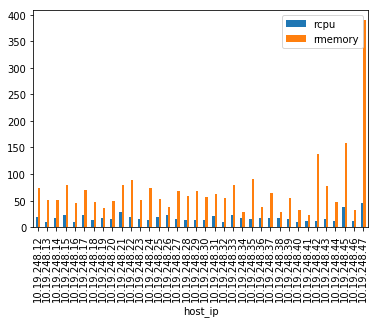

In [13]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
res = runnings[["host_ip", "rcpu", "rmemory",]]# "lcpu", "lmemory", "pod"]]
res.groupby('host_ip').sum().plot(kind='bar')

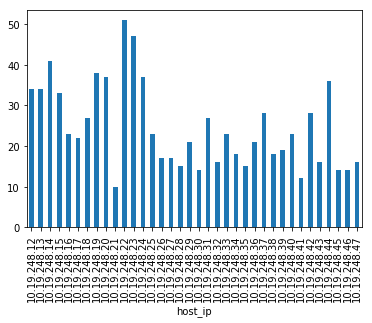

In [14]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
runnings.groupby('host_ip').size().plot(kind='bar')

In [3]:
from k8sclient.dataframes import collect_services
services, ports, eips = collect_services()

In [16]:
# external_ports = pd.merge(ports, eips)
a = pd.merge(services, ports, left_on="uid", right_on="service_id")
a[a.node_port == "32317"]

,creation,external_name,name_x,namespace,type,uid,name_y,node_port,port,protocol,service_id,target_port
143,2017-07-21 03:53:00+00:00,None,cc-watch,cc-itg,NodePort,16e08e8e-6dc8-11e7-a4c4-1866da19c727,None,32317,8817,TCP,16e08e8e-6dc8-11e7-a4c4-1866da19c727,8817


In [16]:
# check conflict external ip ports
import pandas as pd
external_ports = pd.merge(ports, eips)
a = pd.merge(services, external_ports, left_on="uid", right_on="service_id")
b = a[['namespace', "name_x", "type", "port", "target_port", "external_ip"]]
c = b[["external_ip", "port"]].duplicated(keep=False)
b[c].set_index(["external_ip","port"]).sort_index()

namespace                          name_x  \
external_ip   port                                                       
10.19.248.13  22181              aaron              pre1-zookeeper1-ex   
              22181           ex-kafka              pre1-zookeeper1-ex   
              22181  kafka-stable-test              pre1-zookeeper1-ex   
              22181            lbsheng              pre1-zookeeper1-ex   
              22181                ljc              pre1-zookeeper1-ex   
              22181         multi-test              pre1-zookeeper1-ex   
              22181               ping              pre1-zookeeper1-ex   
              22181      shared-hadoop              pre1-zookeeper1-ex   
              22181                slb              pre1-zookeeper1-ex   
              28087              aaron        pre1-resourcemanager1-ex   
              28087   dataflow-demo-ye        pre1-resourcemanager1-ex   
              28088            lbsheng        pre1-resourcemanager1-ex   
              28088                ljc        pre1-resourcemanager1-ex   
              39887              aaron        pre1-resourcemanager1-ex   
              39887   dataflow-demo-ye        pre1-resourcemanager1-ex   
              39888                ary        pre1-resourcemanager1-ex   
              39888            lbsheng        pre1-resourcemanager1-ex   
              39888                ljc        pre1-resourcemanager1-ex   
              39888      shared-hadoop        pre1-resourcemanager1-ex   
              52070                ljc               pre1-namenode1-ex   
              52070               ping               pre1-namenode1-ex   
              53070              aaron               pre1-namenode1-ex   
              53070   dataflow-demo-ye               pre1-namenode1-ex   
10.19.248.14  22181              aaron              pre1-zookeeper2-ex   
              22181           ex-kafka              pre1-zookeeper2-ex   
              22181  kafka-stable-test              pre1-zookeeper2-ex   
              22181            lbsheng              pre1-zookeeper2-ex   
              22181                ljc              pre1-zookeeper2-ex   
              22181         multi-test              pre1-zookeeper2-ex   
              22181               ping              pre1-zookeeper2-ex   
...                                ...                             ...   
10.19.248.16  8088           iot-demo1                resourcemanager2   
              8088           iot-demo2                resourcemanager2   
10.19.248.18  24040           ex-kafka                 pre1-master3-ex   
              24040              yiren                 pre1-master1-ex   
              26066           ex-kafka                 pre1-master3-ex   
              26066              yiren                 pre1-master1-ex   
              27077           ex-kafka                 pre1-master3-ex   
              27077              yiren                 pre1-master1-ex   
              28080           ex-kafka                 pre1-master3-ex   
              28080              yiren                 pre1-master1-ex   
              38080           ex-kafka                 pre1-master3-ex   
              38080              yiren                 pre1-master1-ex   
              8020                 ljc                           sqoop   
              8020      streaming-demo                       namenode1   
10.19.248.19  23000         wanglipeng                         impalad   
              23000         wanglipeng                     statestored   
10.19.248.20  22181                ljc              pre1-zookeeper4-ex   
              22181               ping              pre1-zookeeper4-ex   
10.19.248.200 10153        kube-system  dns-controller-outside-enndata   
              10153        kube-system  dns-controller-outside-enndata   
              53           kube-system          dns-controller-outside   
              53           kube-s

In [17]:
a = pd.merge(services, ports, left_on="uid", right_on="service_id")
b = a[['namespace', "name_x", "type", "node_port", "target_port"]]
c = b["node_port"].duplicated(keep=False) & (b.node_port != "None")
b[c].set_index(["node_port"]).sort_index()

,namespace,name_x,type,target_port
node_port,,,,


In [23]:
external_ports = pd.merge(ports, eips)
external_ports = pd.merge(services, external_ports, left_on="uid", right_on="service_id")[['namespace', "name_x", "type", "node_port", "port"]]
# external_ports
a = pd.merge(services, ports, left_on="uid", right_on="service_id")
node_ports = a[a.type=="NodePort"][['namespace', "name_x", "type", "node_port", "target_port"]]
pd.merge(node_ports, external_ports, left_on="node_port", right_on="port", how="outer").dropna()

,namespace_x,name_x_x,type_x,node_port_x,target_port,namespace_y,name_x_y,type_y,node_port_y,port
72,cust-pro,gitlab,NodePort,30993,443,cust-pro,gitlab,NodePort,30993,30993
73,cust-pro,gitlab,NodePort,30994,22,cust-pro,gitlab,NodePort,30994,30994


In [20]:
external_ports

,name,node_port,port,protocol,service_id,target_port,external_ip
0,nn-http-addr,None,53070,TCP,2b196ec1-7833-11e7-8070-244427a00032,50070,10.19.248.13
1,nn-http-addr,None,53070,TCP,2b49b573-7833-11e7-8070-244427a00032,50070,10.19.248.14
2,yarn-http,None,28087,TCP,2b5b8035-7833-11e7-8070-244427a00032,8088,10.19.248.13
3,jhs-http,None,39887,TCP,2b5b8035-7833-11e7-8070-244427a00032,19888,10.19.248.13
4,yarn-http,None,28087,TCP,2b711156-7833-11e7-8070-244427a00032,8088,10.19.248.14
5,jhs-http,None,39887,TCP,2b711156-7833-11e7-8070-244427a00032,19888,10.19.248.14
6,clientport,None,22181,TCP,1e08ec97-7827-11e7-8070-244427a00032,2181,10.19.248.13
7,clientport,None,22181,TCP,1e1bfb6e-7827-11e7-8070-244427a00032,2181,10.19.248.14
8,clientport,None,22181,TCP,1e2c7d87-7827-11e7-8070-244427a00032,2181,10.19.248.15
9,clientport,None,58082,TCP,93acafd5-70e6-11e7-8e47-244427a00032,8082,10.19.248.13
